In [1]:
#cau1:
import pandas as pd
import math
data=pd.read_csv('income_spend.csv')
data.head(20)


,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174


In [2]:
data.shape

(303, 2)

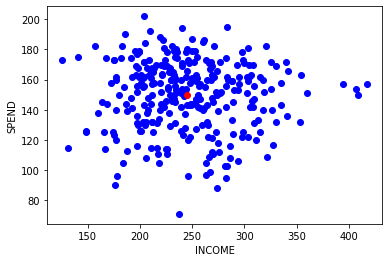

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
plt.xlabel('INCOME')
plt.ylabel('SPEND')
plt.scatter(x = data['INCOME'],y = data['SPEND'],  color = 'blue')

kmeans = KMeans(n_clusters=1, random_state=0).fit(data)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'r')
plt.show()



In [4]:
#cau2
print("centroid")
print(kmeans.cluster_centers_)
print("Khoảng cách của mỗi điểm đến Centroid")
def distance(p1,p2):
	return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
tong = 0
for i in range(len(data)):
    tong = tong +distance(data.iloc[i].values,kmeans.cluster_centers_[0])
    print(distance(data.iloc[i].values,kmeans.cluster_centers_[0]))
print("Tổng khoảng cách của mỗi điểm đến Centroid")
print(tong)

centroid
[[245.27392739 149.64686469]]
Khoảng cách của mỗi điểm đến Centroid
12.279006400841164
37.6509293383322
46.93825455602452
29.831292486133066
109.54298283003257
53.29937619843587
48.84131108149019
29.318638765297155
47.894428782718784
81.02058413944884
12.10576621902366
31.575229536839625
29.75779685123588
34.73599256837279
39.697059166174064
27.569804682026668
97.32775292762632
40.52386012111864
21.422784934819195
6.4181882261343635
15.999847508776758
31.815968418024266
34.2838819162592
12.849666617671346
54.26948164904402
58.0555532702827
34.07671995771287
75.15637211054668
171.8834273920941
48.33124570837432
50.71155476783152
68.9520932235423
46.4895929108546
27.82574972982547
40.60879619275731
69.05444643503648
62.153050777610076
20.29571167471882
23.783159686226416
114.73405209903113
63.19046387125597
30.354371342164836
37.31029116175236
19.870747480973748
82.34781986874816
82.80041854799559
32.04475631726388
13.336532799149479
45.35821929482944
15.306496976024498
10.74556

In [51]:
#cau 3:#Dùng K-means trong thư viện Sklearn để xác định centroid.
#Với K từ 1 đến 10, trong mỗi vòng lặp của K thì tính WCSS bằng công thức và dùng hàm ở trên
def WCSS(X, centers):
    print(len(centers),"centroid")
    print(centers)
    a = list(range(centers.shape[0]))
    for i in range(centers.shape[0]):
        CT1= sum(np.sqrt(pow((X['INCOME'] - centers[i,0]),2)+pow(( X['SPEND'] - centers[i,1]),2)))/(X.shape[0])
        a.insert(0,CT1)
        print("WCSS cua centroid ",i+1,": ",CT1)
    print("--------------------------------------")
    y.insert(0,sum(a)/centers.shape[0])
    x.insert(0,len(centers))
    return x,y
from sklearn.metrics import pairwise_distances_argmin
x = []
y = []
for i in range(10):
    kmeans = KMeans(n_clusters=i+1)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    x, y = WCSS(data,kmeans.cluster_centers_)

1 centroid
[[245.27392739 149.64686469]]
WCSS cua centroid  1 :  45.681889205604506
--------------------------------------
2 centroid
[[213.19553073 151.67597765]
 [291.58064516 146.71774194]]
WCSS cua centroid  1 :  51.845100229544904
WCSS cua centroid  2 :  62.70808238978651
--------------------------------------
3 centroid
[[317.55       148.73333333]
 [196.68224299 150.57943925]
 [251.61764706 149.31617647]]
WCSS cua centroid  1 :  80.95456119371785
WCSS cua centroid  2 :  60.867796375887316
WCSS cua centroid  3 :  46.38401379410623
--------------------------------------
4 centroid
[[262.63461538 122.32692308]
 [242.04807692 163.49038462]
 [318.61403509 152.50877193]
 [192.52222222 147.62222222]]
WCSS cua centroid  1 :  56.602388075183285
WCSS cua centroid  2 :  47.07783204776095
WCSS cua centroid  3 :  81.83126588626415
WCSS cua centroid  4 :  63.78799001532518
--------------------------------------
5 centroid
[[321.25       153.51923077]
 [194.68085106 125.70212766]
 [244.4158415

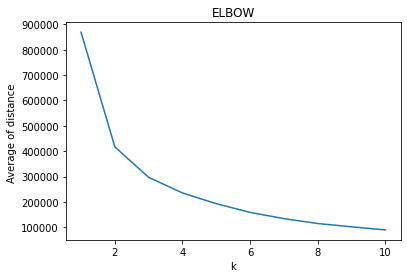

In [24]:
#cau4:
Averageofdistance = []
K = range(1, 11)
for i in K:
    km = KMeans(n_clusters = i).fit(data)
    Averageofdistance.append(km.inertia_)
plt.plot(K,Averageofdistance)
plt.xlabel('k')
plt.ylabel('Average of distance ')
plt.title('ELBOW')
plt.show()

--------------- 1  centroid ---------------


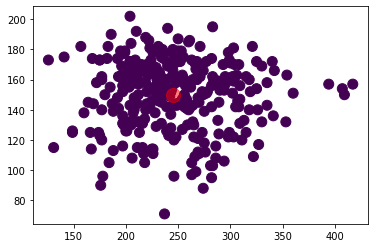

--------------- 2  centroid ---------------


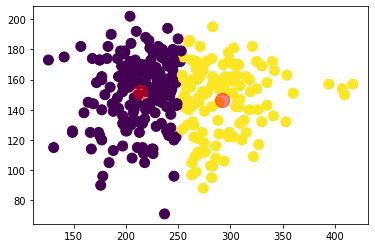

--------------- 3  centroid ---------------


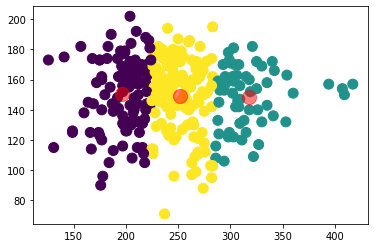

--------------- 4  centroid ---------------


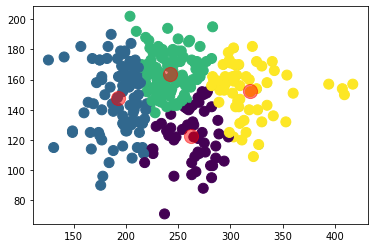

--------------- 5  centroid ---------------


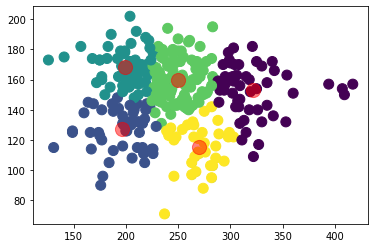

--------------- 6  centroid ---------------


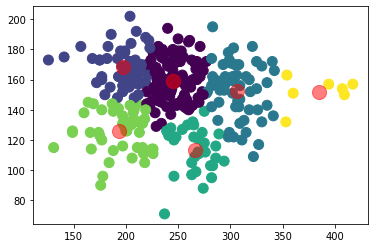

--------------- 7  centroid ---------------


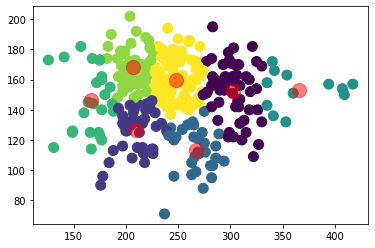

--------------- 8  centroid ---------------


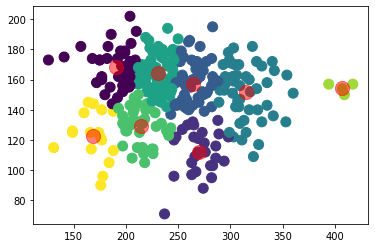

--------------- 9  centroid ---------------


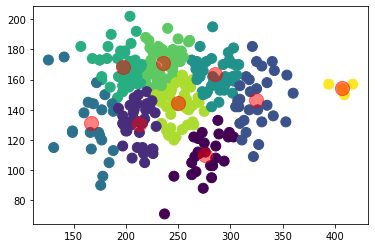

--------------- 10  centroid ---------------


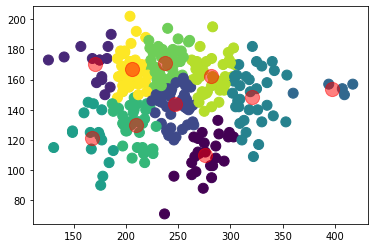

In [28]:
#cau 5
for i in range(10):
    plt.scatter(data['INCOME'], data['SPEND'], s=50)
    kmeans = KMeans(n_clusters=i+1).fit(data)
    print("---------------",i+1," centroid ---------------")
    plt.scatter(data['INCOME'], data['SPEND'], c=kmeans.predict(data), s=100, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
    plt.show()